# TheDataIncubator Challenge Q3: Project_Plot 1

## Title: Developing robust key performance indicators (KPI's) for the base utility power plant by employing machine learning on readily available data.

In this project ML approach is demonstrated to predict net power output ($PE$) of base utility combined cycle power plant (CCPP). The CCPP consist of gas turbine (GT), stream turbine (ST), and heat recovery steam generators (HRSG). This type of power plant is being installed in increasing numbers around the world where there is access to substantial quantities of natural gas [1].

Gas turbine power output primarily depends on the ambient parameters which are ambient temperature, atmospheric pressure, and relative humidity. Steam turbine power output has a direct relationship with vacuum at exhaust [2]. Building on that four parameters that are readily available in a CCPP are selected: ambient temperature ($AT$), ambient pressure ($AP$), relative humidity ($RH$), and exhaust vacuum ($V$).

Dataset used was contained 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load. Data was collected by Pınar Tüfekci [2], and is available at: http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant. 

[1] Ramireddy V. An overview of combined cycle power plant. <http://electricalengineering-portal.com/an-overview-of-combined-cycle-power-plant> [accessed: 02.03.13].

[2] Tüfekci P. Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, Electrical Power and Energy Systems, 60, 126–140, 2014. 

In [64]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
df=pd.read_excel('CCPP_data.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [66]:
# Data is aleardy sorted and reported only where plant was operating at normal conditions
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### To find the correlation of PE with AT, V, AP, and RH

In [67]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


## Plot 1

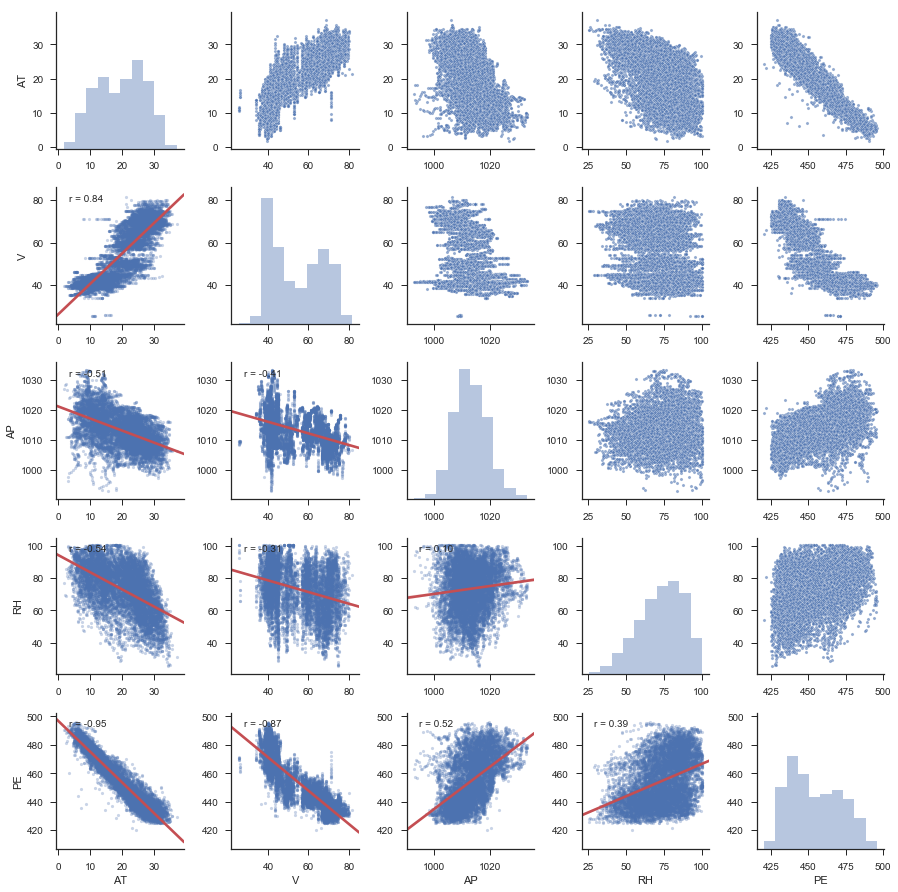

In [68]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

fig1 = sns.PairGrid(df, palette='muted')
fig1.map_upper(plt.scatter, s=10, edgecolor="white", alpha=0.6)
fig1.map_diag(sns.distplot, hist=True, kde=False, bins=10)
#fig1.map_lower(sns.kdeplot)
fig1.map_lower(sns.regplot, scatter=True, scatter_kws={"s":10,"alpha":0.30}, line_kws={"color":'r'})
fig1.map_lower(corrfunc)
plt.show()

### Insight from Plot 1:
* AT and V has inverse relationship with PE, meaning power out from the plant will be higher when the atmospheric temperature and vacuum in steam turbine exhaust are low. 
* AP and RH have relatively weak correlation with PE.
* Correlation among the parameters is also weak, showing independent nature of variables.